Veri setini [şu adresten](https://www.kaggle.com/uciml/pima-indians-diabetes-database) indirebilirsiniz.

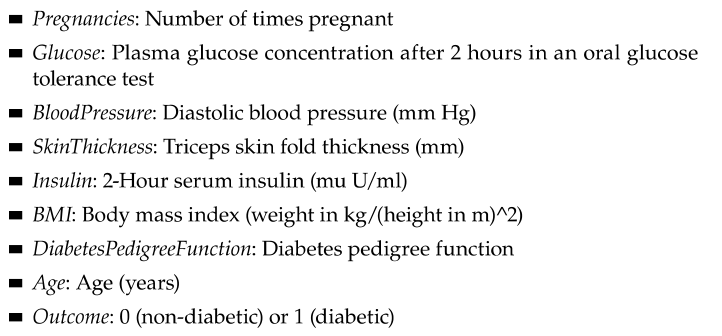

In [147]:
# Kütüphanelerimiz
import numpy as np
import pandas as pd
from sklearn import linear_model, svm, naive_bayes, tree, neural_network
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [116]:
# Veri setini yükleme
df = pd.read_csv("diabetes.csv")

# İlk 5 satırı gösterme
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [117]:
# Null değerleri görüntülediğimiz kısım (Bilgi edinme kısmı)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Veri setinde 768 satır var ve 9 özellik var.

In [118]:
# Veri setinde "NULL" kısım var mı? Varsa toplam kaçar adet var?
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Eksik veri yok.

In [119]:
# Sıfır değerini içeren verilere bakalım.
df.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [120]:
# Sıfır olan değerler bizleri yanıltacağı için bunları NaN olarak değiştirelim.
# Bir kişi hiç hamile kalmamış olabilir veya bu kişi Erkek olabilir.
# Haricen sonuç (OUTCOME) değerimiz sıfır olabilir. Bu yüzden onu değiştirmeyelim.
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']].replace(0,np.NaN)

In [121]:
# Eksik verileri ortalama ile dolduralım.
df.fillna(df.mean(),inplace=True)

In [122]:
# Şimdi 0 olan değerleri görelim.
df.eq(0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [123]:
# Korelasyon analizi
# Çıktı değişkenine hangi özelliklerin etki ettiğini korelasyon ile görebiliriz.
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


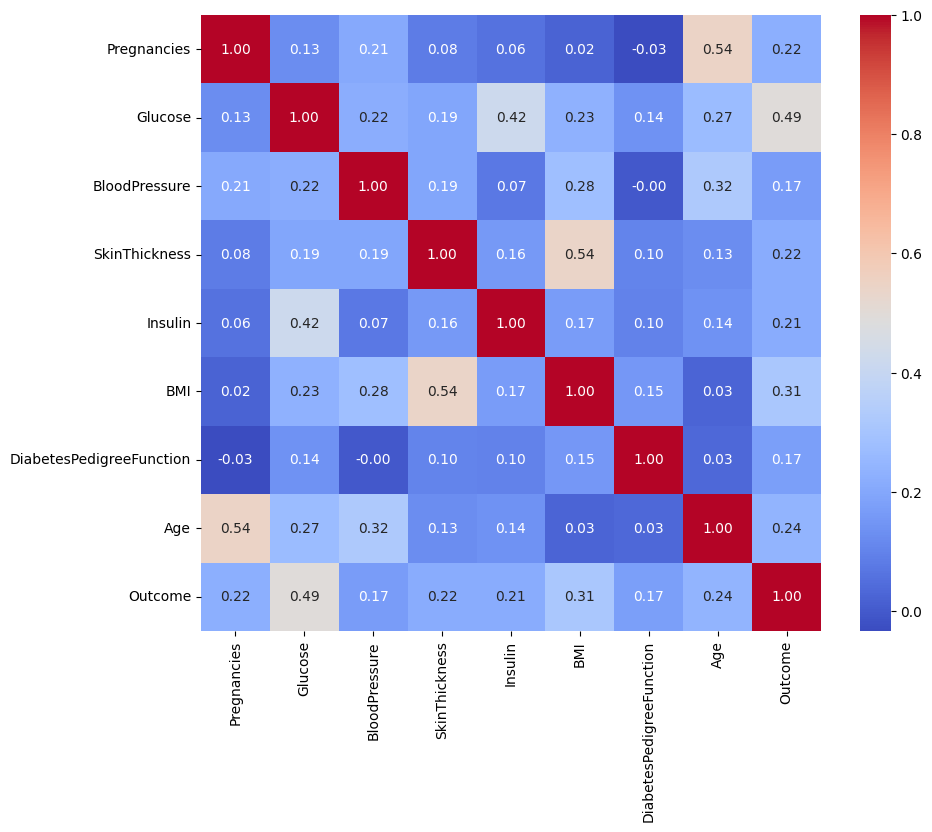

In [124]:
# Korelasyon grafiği
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Kabarcak Grafiği

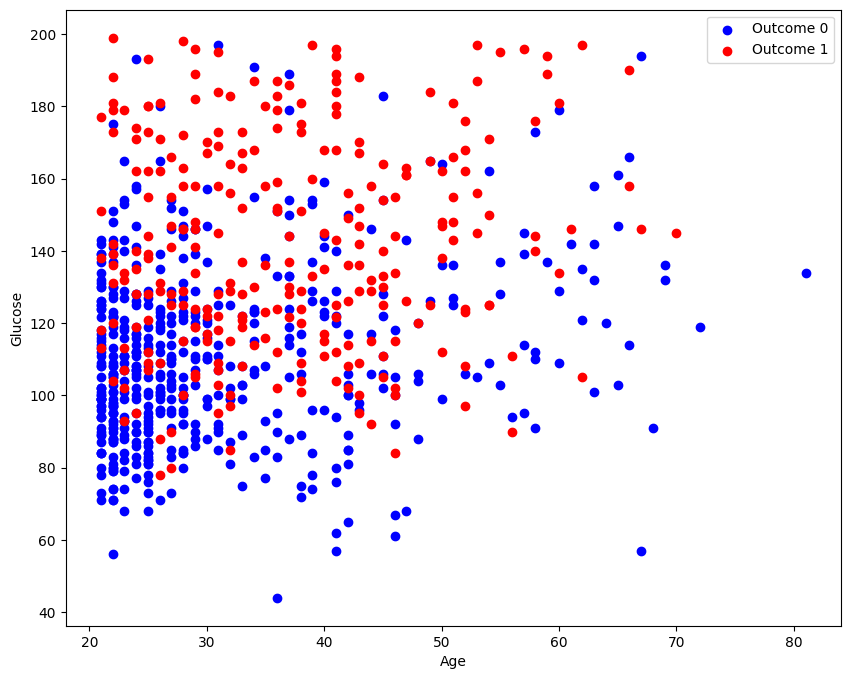

In [125]:
X = df[['Glucose', 'BMI', 'Age']].values
y = df['Outcome'].values

# Örnek veri çizimi Çubuk Grafik
# Yaşlarına göre Glukoz ve BMI değerlerini karşılaştıralım.
plt.figure(figsize=(10, 8))
plt.scatter(df[df['Outcome'] == 0]['Age'], df[df['Outcome'] == 0]['Glucose'], color='blue', label='Outcome 0')
plt.scatter(df[df['Outcome'] == 1]['Age'], df[df['Outcome'] == 1]['Glucose'], color='red', label='Outcome 1')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.legend()
plt.show()



#Çubuk Grafiği (Maksimum Verileri)

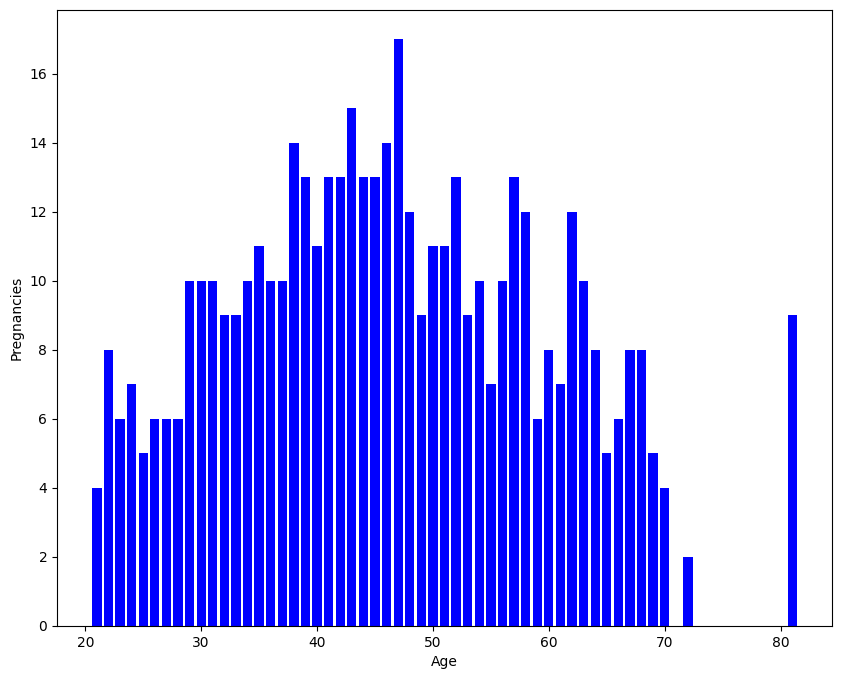

In [126]:
# Age ve Pregnancies için çubuk grafiği çizimi
X = df[['Age']].values
y = df[['Pregnancies']].values
plt.figure(figsize=(10, 8))
plt.bar(X[:, 0], y[:, 0], color='blue')  # Use plt.bar for bar chart
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.show()


In [127]:
X = df[['Glucose','BMI','Age',]].values
y=df.iloc[:,8].values

In [128]:
# Outcome değişkenine en yüksek korelasyona sahip 4 özellik
top_correlated_features = df.corr().nlargest(4, 'Outcome').index
print(top_correlated_features)

Index(['Outcome', 'Glucose', 'BMI', 'Age'], dtype='object')


# Burada outcome değişkenine en fazla korelasyona sahip 'Glucose', 'BMI', 'Age' özellikleri ile
# analize devam edelim.

In [130]:
X = df[['Glucose','BMI','Age']].values
y=df.iloc[:,8].values

Eğitim ve test kümeleri

In [131]:
# Veri setini eğitim ve test kümelerine ayırın (Veri setinin %66'sı eğitim için, %34'ü test için ayrıldı)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=42)

Modeller
1. Lojistik Regresyon
2. Destek Vektör Makineleri (SVM)
3. Naive Bayes
4. Karar Ağacı
5. Yapay Sinir Ağı

In [139]:
# Modelleme ve doğruluk skorlarının hesaplanması
models = {
    "Lojistik Regresyon": linear_model.LogisticRegression(),
    "Destek Vektör Makineleri (SVM)": svm.SVC(kernel='linear'),
    "Naive Bayes": naive_bayes.GaussianNB(),
    "Karar Ağacı": tree.DecisionTreeClassifier(),
    "Yapay Sinir Ağı": neural_network.MLPClassifier()
}
resultsAll={}
results34 = {}

In [153]:
for name, model in models.items():
    score =cross_val_score(model,X,y,cv=10,scoring='accuracy').mean()
    resultsAll[name] = score
    print(f"{name} Doğruluk Skoru: {score}")

for name, model in models.items():
    score = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy').mean()
    results34[name] = score
    print(f"{name} Doğruluk Skoru: {score}")


Lojistik Regresyon Doğruluk Skoru: 0.7669856459330144
Destek Vektör Makineleri (SVM) Doğruluk Skoru: 0.7656527682843473
Naive Bayes Doğruluk Skoru: 0.7734962406015038
Karar Ağacı Doğruluk Skoru: 0.6717703349282296


c:\Users\a_bir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\a_bir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\a_bir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\a_bir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

Yapay Sinir Ağı Doğruluk Skoru: 0.7318694463431306
Lojistik Regresyon Doğruluk Skoru: 0.7823529411764707
Destek Vektör Makineleri (SVM) Doğruluk Skoru: 0.786235294117647
Naive Bayes Doğruluk Skoru: 0.786313725490196
Karar Ağacı Doğruluk Skoru: 0.7173725490196078


c:\Users\a_bir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\a_bir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\a_bir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\a_bir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

Yapay Sinir Ağı Doğruluk Skoru: 0.7034509803921569


c:\Users\a_bir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [149]:
# # Modelin tamamının(%100) iyi modelin seçilmesi
# best_model = max(resultsAll, key=resultsAll.get)
# print(f"\nEn İyi Model: {best_model} (Doğruluk Skoru: {resultsAll[best_model]})")

# %34 olan modelin iyi modelin seçilmesi
best_model = max(results34, key=results34.get)
print(f"\nEn İyi Model: {best_model} (Doğruluk Skoru: {results34[best_model]})")



En İyi Model: Naive Bayes (Doğruluk Skoru: 0.7734962406015038)


In [142]:
# Modelin Kaydedileceği Yer
filename='diabets.sav'

In [136]:
# Modelin kaydedilmesi
best_model_instance = models[best_model]
best_model_instance.fit(X_train, y_train)
pickle.dump(best_model_instance, open(filename, 'wb'))

In [137]:
# Modelin yüklenmesi
loaded_model = pickle.load(open(filename,'rb'))

In [152]:
# prediction
Glucose = 5
BMI = 90
Age = 90
prediction = loaded_model.predict([[Glucose,BMI,Age]])
if prediction==1:
    print("Diyabet olabilir")
else:
    print("Diyabet olmayabilir")

Diyabet olabilir
